In [2]:
import pandas as pd
from api_key import geo_key
import requests
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
pre_covid = pd.read_csv("CSVs/PreCovid_a.csv")
during_covid = pd.read_csv("CSVs/DuringCovid_a.csv")

In [3]:
pre_covid

,Parent Name,Area Name,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,North East region,Hartlepool,2017 - 19,10.361530,26.0,Similar,Similar
1,North East region,Middlesbrough,2017 - 19,14.464680,49.0,Worse,Similar
2,North East region,Redcar and Cleveland,2017 - 19,13.538658,47.0,Similar,Similar
3,North East region,Stockton-on-Tees,2017 - 19,8.673680,45.0,Similar,Better
4,North East region,Darlington,2017 - 19,13.646433,38.0,Similar,Similar
...,...,...,...,...,...,...,...
142,East of England region,Suffolk,2017 - 19,9.531723,188.0,Similar,Similar
143,South East region,Surrey,2017 - 19,8.180909,255.0,Better,Better
144,West Midlands region,Warwickshire,2017 - 19,9.382023,143.0,Similar,Similar
145,South East region,West Sussex,2017 - 19,9.678995,216.0,Similar,Similar


In [4]:
during_covid

,Parent Name,Area Name,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,North East region,Hartlepool,2019 - 21,14.667019,36.0,Similar,Similar
1,North East region,Middlesbrough,2019 - 21,14.879852,54.0,Worse,Similar
2,North East region,Redcar and Cleveland,2019 - 21,19.750601,69.0,Worse,Worse
3,North East region,Stockton-on-Tees,2019 - 21,10.206445,52.0,Similar,Similar
4,North East region,Darlington,2019 - 21,16.598023,47.0,Worse,Similar
...,...,...,...,...,...,...,...
144,East of England region,Suffolk,2019 - 21,10.387505,208.0,Similar,Similar
145,South East region,Surrey,2019 - 21,10.096817,316.0,Similar,Similar
146,West Midlands region,Warwickshire,2019 - 21,11.215052,172.0,Similar,Similar
147,South East region,West Sussex,2019 - 21,11.533312,265.0,Similar,Similar


In [5]:
name = []
lat = []
lon = []
value = []

for x in range(len(pre_covid)):
    area = pre_covid["Area Name"][x]
    base_url = "https://api.geoapify.com/v1/geocode/search?"
    params = {
        "apiKey": geo_key,
        "city": f"{area}",
        "country": "England",
        "format":"json"
    }
    
    response = requests.get(base_url, params=params).json()

    name.append(area)
    lon.append(response["results"][0]["lon"])
    lat.append(response["results"][0]["lat"])
    value.append(pre_covid["Value"][x])

In [6]:
df = pd.DataFrame({
    "County": name,
    "Longitude": lon,
    "Latitude": lat,
    "Value": value
})
df.head()

,County,Longitude,Latitude,Value
0,Hartlepool,-1.261830,54.674404,10.361530
1,Middlesbrough,-1.234405,54.576042,14.464680
2,Redcar and Cleveland,-1.005496,54.567906,13.538658
3,Stockton-on-Tees,-1.312916,54.564094,8.673680
4,Darlington,-1.552943,54.535256,13.646433


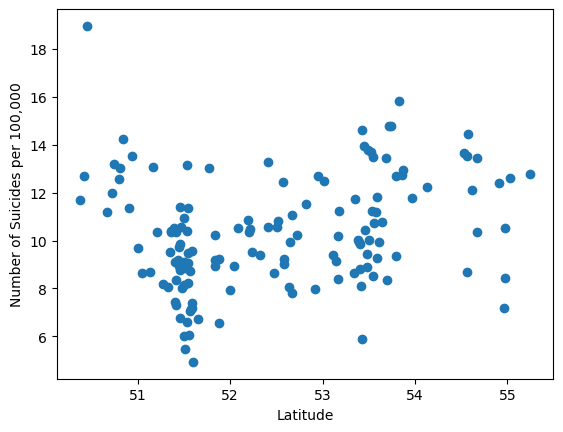

In [7]:
plt.scatter(df["Latitude"], df["Value"]);
plt.xlabel("Latitude")
plt.ylabel("Number of Suicides per 100,000")
plt.show()

In [8]:
def lin_reg_plot(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    values = (slope * x) + intercept
    line_eq = f"y = {slope}x + {intercept}"
    return print(f"The r-value is: {rvalue}"), print(f"The linear regression line's formula is: {line_eq}"), plt.scatter(x, y), plt.plot(x, values, "r-")

The r-value is: 0.2396017471165084
The linear regression line's formula is: y = 0.46019927454067433x + -13.879332069741666


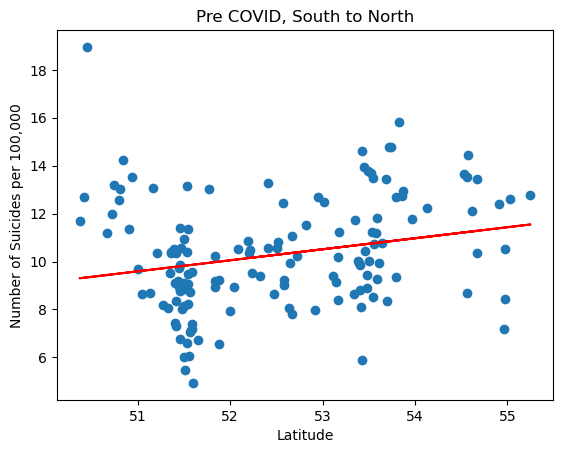

In [17]:
lin_reg_plot(df["Latitude"], df["Value"])
plt.xlabel("Latitude")
plt.ylabel("Number of Suicides per 100,000")
plt.title("Pre COVID, South to North")
plt.show()

In [10]:
name = []
lat = []
lon = []
value = []

for x in range(len(during_covid)):
    area = during_covid["Area Name"][x]
    base_url = "https://api.geoapify.com/v1/geocode/search?"
    params = {
        "apiKey": api_key,
        "city": f"{area}",
        "country": "England",
        "format":"json"
    }
    
    response = requests.get(base_url, params=params).json()

    name.append(area)
    lon.append(response["results"][0]["lon"])
    lat.append(response["results"][0]["lat"])
    value.append(during_covid["Value"][x])

In [11]:
df2 = pd.DataFrame({
    "County": name,
    "Longitude": lon,
    "Latitude": lat,
    "Value": value
})
df2.head()

,County,Longitude,Latitude,Value
0,Hartlepool,-1.261830,54.674404,14.667019
1,Middlesbrough,-1.234405,54.576042,14.879852
2,Redcar and Cleveland,-1.005496,54.567906,19.750601
3,Stockton-on-Tees,-1.312916,54.564094,10.206445
4,Darlington,-1.552943,54.535256,16.598023


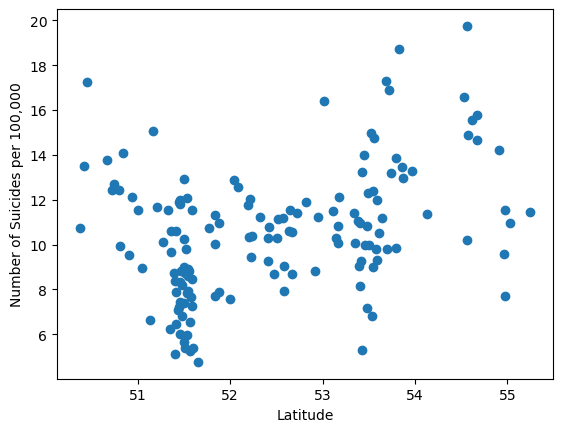

In [12]:
plt.scatter(df2["Latitude"], df2["Value"]);
plt.xlabel("Latitude")
plt.ylabel("Number of Suicides per 100,000")
plt.show()

The r-value is: 0.3594778931703123
The linear regression line's formula is: y = 0.8589752693833681x + -34.54673836436104


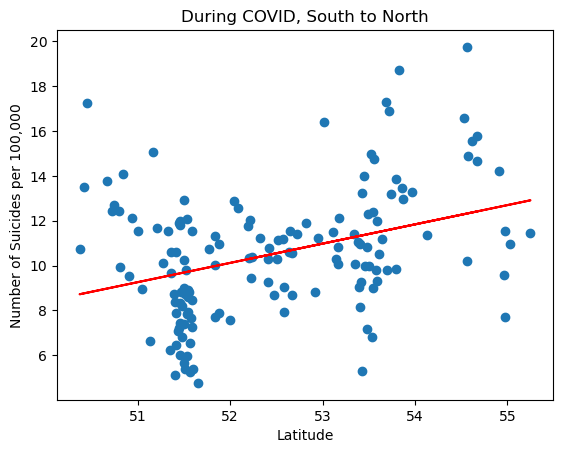

In [16]:
lin_reg_plot(df2["Latitude"], df2["Value"])
plt.xlabel("Latitude")
plt.ylabel("Number of Suicides per 100,000")
plt.title("During COVID, South to North")
plt.show()

The r-value is: -0.3047946595683573
The linear regression line's formula is: y = -0.6136862130573161x + 9.485226878437901


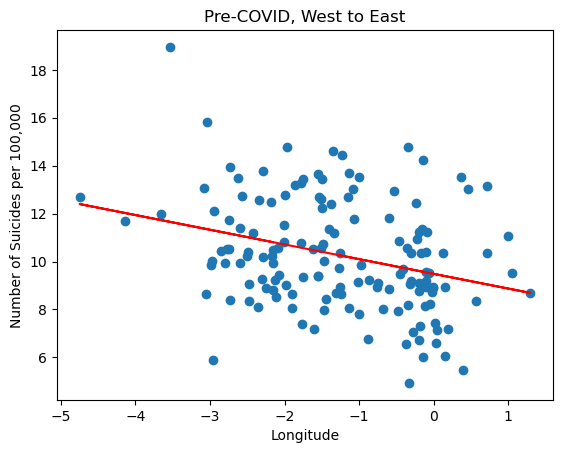

In [14]:
lin_reg_plot(df["Longitude"], df["Value"])
plt.xlabel("Longitude")
plt.ylabel("Number of Suicides per 100,000")
plt.title("Pre-COVID, West to East")
plt.show()

The r-value is: -0.38809507948143124
The linear regression line's formula is: y = -0.9711172606130576x + 9.289520468460193


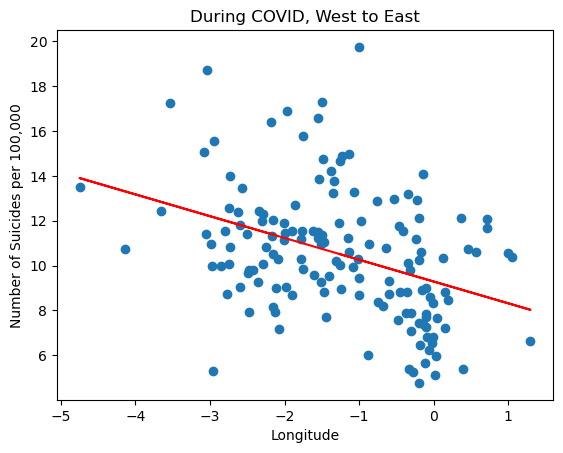

In [15]:
lin_reg_plot(df2["Longitude"], df2["Value"])
plt.xlabel("Longitude")
plt.ylabel("Number of Suicides per 100,000")
plt.title("During COVID, West to East")
plt.show()